# Q)
# Consider only the below columns and prepare a prediction model for predicting Price.Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


# 1. <u>Import necessasry libraries - 

In [88]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats as stats

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 2. <u>Import Warnings -  

In [89]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [90]:
corolla_data = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
corolla_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# 4. <u>Data Understanding -  

## (4.1) <u>Initial analysis - 

## Model -- model of the car
## Price  -- Offer Price in EUROs	
## Age_08_04 -- Age in months as in August 2004	
## Mfg_Month -- Manufacturing month (1-12)	
## Mfg_Year	-- Manufacturing Year
## KM -- Accumulated Kilometers on odometer
## Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
## HP -- Horse Power
## Met_Color	 -- Metallic Color?  (Yes=1, No=0)
## Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
## Automatic	-- Automatic ( (Yes=1, No=0)
## cc -- Cylinder Volume in cubic centimeters
## Doors -- Number of doors
## Cylinders	-- Number of cylinders
## Gears -- Number of gear positions
## Quarterly_Tax -- Quarterly road tax in EUROs
## Weight -- Weight in Kilograms
## Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
## BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
## Guarantee_Period -- 	Guarantee period in months
## ABS -- Anti-Lock Brake System (Yes=1, No=0)
## Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
## Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
## Airco -- Airconditioning  (Yes=1, No=0)
## Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
## Boardcomputer -- Boardcomputer  (Yes=1, No=0)
## CD_Player -- CD Player  (Yes=1, No=0)
## Central_Lock -- Central Lock  (Yes=1, No=0)
## Powered_Windows -- Powered Windows  (Yes=1, No=0)
## Power_Steering -- Power Steering  (Yes=1, No=0)
## Radio -- Radio  (Yes=1, No=0)
## Mistlamps	-- Mistlamps  (Yes=1, No=0)
## Sport_Model -- Sport Model  (Yes=1, No=0)
## Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
## Metallic_Rim --Metallic Rim  (Yes=1, No=0)
## Radio_cassette -- Radio Cassette  (Yes=1, No=0)
## Tow_Bar -- Tow Bar  (Yes=1, No=0)


 

In [91]:
corolla_data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [92]:
corolla_data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [93]:
corolla_data.shape

(1436, 38)

# 5. <u>Data Preparation -  

## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] 

In [94]:
corolla = corolla_data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Removing duplicate rows

In [95]:
corolla.duplicated().sum()

1

In [96]:
corolla[corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [97]:
corolla.drop_duplicates(inplace = True)

In [98]:
corolla.reset_index(drop = True, inplace= True)

In [99]:
corolla.duplicated().sum()

0

# 6.<u>Data Visualisation -  

## Correlation Matrix  

In [100]:
corolla.describe()                                                  

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


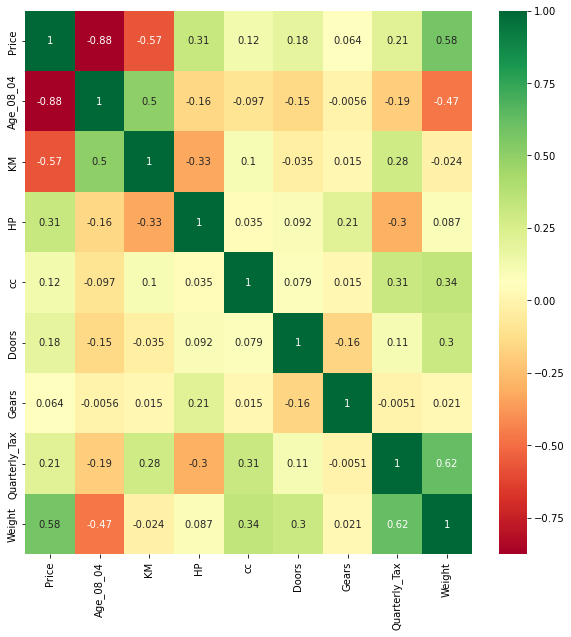

In [101]:
corelation = corolla.corr()
top_corelation_features = corelation.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corolla[top_corelation_features].corr(),annot=True,cmap="RdYlGn")

## Scatter Plot 

Text(0.5, 1.0, 'Age_08_04 vs Price')

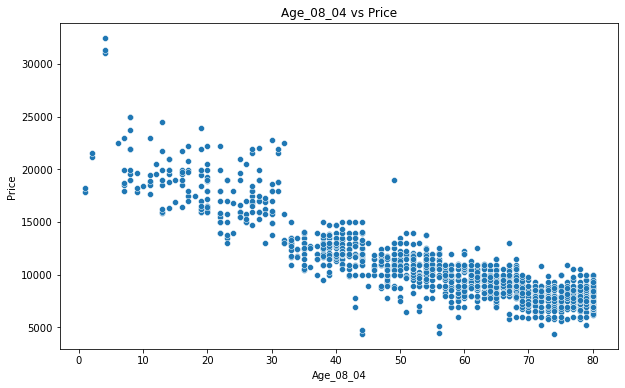

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_08_04',y='Price',data=corolla)
plt.title('Age_08_04 vs Price')

Text(0.5, 1.0, 'Weight vs Price')

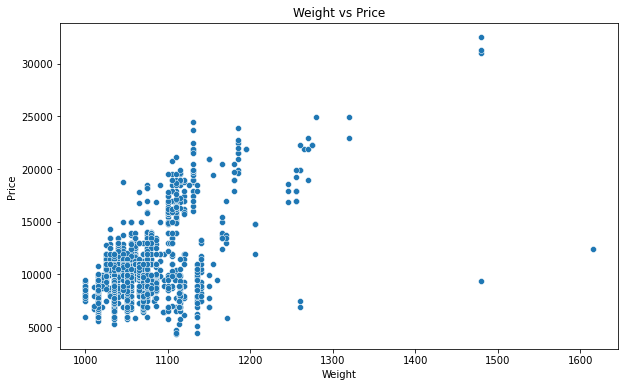

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight',y='Price',data=corolla)
plt.title('Weight vs Price')

## Lm plot for linearity

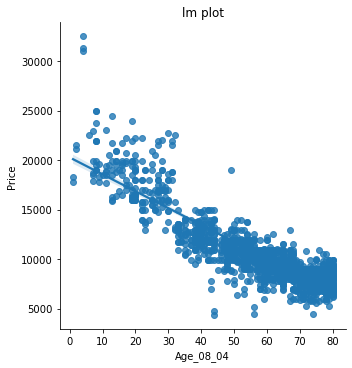

In [104]:
sns.lmplot(x='Age_08_04',y='Price',data=corolla)
plt.title('lm plot')
plt.show()

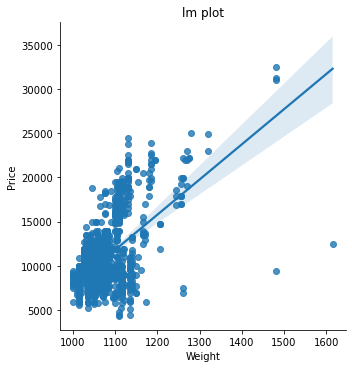

In [105]:
sns.lmplot(x='Weight',y='Price',data=corolla)
plt.title('lm plot')
plt.show()

# 6. <u>Data Preparation -  

In [106]:
x = corolla.drop('Price',axis=1)
y = corolla[['Price']]

# 7. <u>Model Building By sklearn library -  

In [107]:
x = corolla.drop(labels='Price',axis=1)
y = corolla['Price']

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

## <u>Training -  

In [109]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## <u>Testing -  

In [110]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)

## <u>Model Evaluation - 

In [111]:
from sklearn.metrics import mean_squared_error,r2_score

In [112]:
print('mse for train is ',mean_squared_error(y_train,y_pred_train))
print('mse for test is ',mean_squared_error(y_test,y_pred_test))
print('r2_score for train is ',r2_score(y_train,y_pred_train))
print('r2_score for test is ',r2_score(y_test,y_pred_test))

mse for train is  1780392.446058354
mse for test is  1857151.907460018
r2_score for train is  0.860240558229518
r2_score for test is  0.8682311109449776


## <u>StandardScaler Transformation 

In [116]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_scaled = pd.DataFrame(data=x_scaled,columns = x.columns)
x_scaled

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


In [117]:
x_scaled_train,x_scaled_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=12)

## <u>Training -  

In [118]:
linear_model = LinearRegression()
linear_model.fit(x_scaled_train,y_train)

LinearRegression()

## <u>Testing -  

In [119]:
y_pred_train = linear_model.predict(x_scaled_train)
y_pred_test = linear_model.predict(x_scaled_test)

## <u>Model Evaluation - 

In [120]:
print('mse for train is ',mean_squared_error(y_train,y_pred_train))
print('mse for test is ',mean_squared_error(y_test,y_pred_test))
print('r2_score for train is ',r2_score(y_train,y_pred_train))
print('r2_score for test is ',r2_score(y_test,y_pred_test))

mse for train is  1780392.4460583539
mse for test is  1857151.9074600213
r2_score for train is  0.860240558229518
r2_score for test is  0.8682311109449774


# 8. <u>Model Optimization - 

In [125]:
diff_methods = (('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
               ('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax'),
               ('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight'),
               ('Price ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax + Weight'),
               ('Price ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight'),
               ('Price ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight'),
               ('Price ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight'),
               ('Price ~ HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
               ('Price ~ Age_08_04'),('Price~KM'),('Price ~ HP'),('Price ~ cc'),('Price ~ Doors'),
               ('Price ~ Gears'),('Price ~ Quarterly_Tax'),('Price ~ Weight'))

In [126]:
import statsmodels.formula.api as smf

In [128]:
for model in diff_methods:
    models=smf.ols(model,data=corolla).fit()
    print(model)
    
    params=models.params
    print(params)
    
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is greater than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight
Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

pvalue is:
           index              0
0      Intercept   1.113392e-04
1      Age_08_04  1.879217e-288
2             KM   1.994713e-56
3             HP   5.211155e-28
4             cc   1.882393e-01
5          Doors   9.816443e-01
6          Gears   2.452430e-03
7  Quarterly_Tax   3.290363e-03
8         Weight   1.031118e-51

cc is an insignificant feature, since pvalue 0.18823933719307473 is greater than 0.05

Doors is an insignificant feature, since pvalue 0.9816443126769604 is greater than 0.05

aic value is:  24750.407207346932
rsqaure value is:  0.8625200256947
________________________________________________________________________


pvalue is:
       index             0
0  Intercept  1.031004e-06
1         HP  3.123394e-34

aic value is:  27434.75510656108
rsqaure value is:  0.09868025156106075
_____________________________________________________________________________________________________
Price ~ cc
Intercept    9053.536789
cc              1.057605
dtype: float64

pvalue is:
       index              0
0  Intercept  7.236022e-114
1         cc   2.292856e-06

aic value is:  27561.473196759664
rsqaure value is:  0.01546901962024072
_____________________________________________________________________________________________________
Price ~ Doors
Intercept    7916.145233
Doors         695.497769
dtype: float64

pvalue is:
       index             0
0  Intercept  8.976407e-75
1      Doors  2.404166e-12

aic value is:  27534.636141744002
rsqaure value is:  0.0337103971233893
_____________________________________________________________________________________________________
Price ~ Gears
Intercept    4580.93477

## <u>Calculating variance influence factor - 

In [131]:
y=corolla['Price']
x1=corolla['Age_08_04']
x2=corolla['KM']
x3=corolla['cc']
x4=corolla['Doors']
x5=corolla['Gears']
x6=corolla['Weight']

In [134]:
import statsmodels.formula.api as smf
model=smf.ols("y~x1+x2+x3+x4+x5+x6",data=corolla).fit()

In [135]:
newdata=pd.DataFrame({'x1':21,'x2':41711,'x3':1300,'x4':3,'x5':5,'x6':1247},index=[1])
model.predict(newdata)

1    18878.09154
dtype: float64

In [137]:
rsq_x1 = smf.ols('x1~x2+x3+x4+x5+x6',data=corolla).fit().rsquared  
vif_x1 = 1/(1-rsq_x1) # 16.33

rsq_x2 = smf.ols('x2~x1+x3+x4+x5+x6',data=corolla).fit().rsquared  
vif_x2 = 1/(1-rsq_x2) # 564.98

rsq_x3 = smf.ols('x3~x2+x1+x4+x5+x6',data=corolla).fit().rsquared  
vif_x3 = 1/(1-rsq_x3) #  564.84

rsq_x4 = smf.ols('x4~x2+x3+x1+x5+x6',data=corolla).fit().rsquared  
vif_x4 = 1/(1-rsq_x4) #  16.35

rsq_x5 = smf.ols('x4~x2+x3+x1+x5+x6',data=corolla).fit().rsquared  
vif_x5 = 1/(1-rsq_x5) #  16.35

rsq_x6 = smf.ols('x4~x2+x3+x1+x5+x6',data=corolla).fit().rsquared  
vif_x6 = 1/(1-rsq_x6) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['x1','x2','x3','x4','x5','x6'],'VIF':[vif_x1,vif_x2,vif_x3,vif_x4,vif_x5,vif_x6]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,x1,1.856245
1,x2,1.467481
2,x3,1.143155
3,x4,1.136210
4,x5,1.136210
5,x6,1.136210


# <u>Detecting Outliers

## Cook's distance

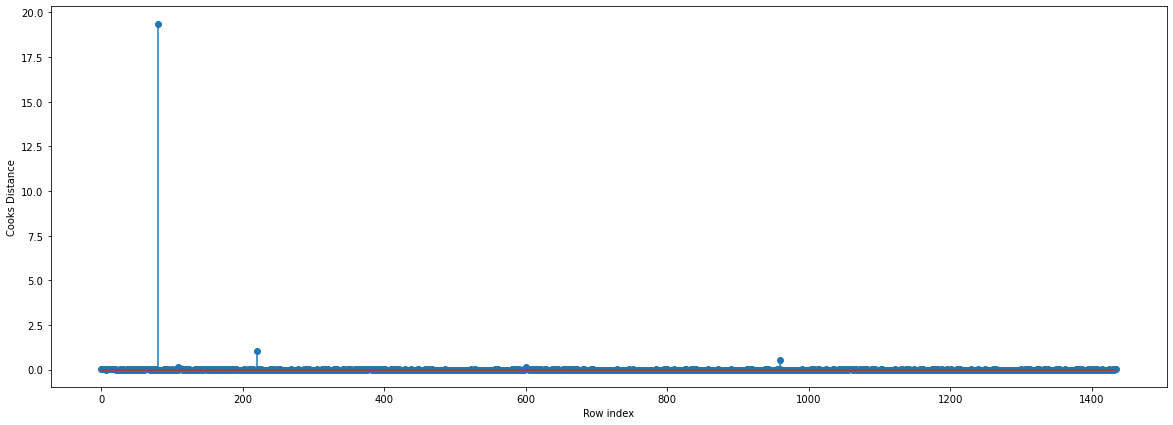

In [155]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [149]:
(np.argmax(c),np.max(c))

(80, 19.376725113203022)

The cook's distance clearly shows that the point 80 is an outlier

## High Influence plot

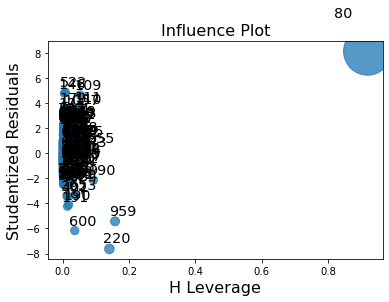

In [158]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(cook_model)
plt.show()

In [161]:
corolla[corolla.index.isin([80, 600 ,959,220])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
220,12450,44,74172,110,1600,5,5,163,1615
600,7500,50,1,90,2000,3,5,64,1260
959,9390,66,50806,86,1300,3,5,19,1480


In [164]:
new_corolla = corolla.drop(corolla.index[[80,601,960,221]],axis=0)
new_corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# <u>Final model

In [165]:
model_final=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=new_corolla).fit()

In [166]:
model_final.rsquared,model_final.aic

(0.8685597306387955, 24615.31593447238)

In [167]:
model_final_door=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight',data=new_corolla).fit()

In [168]:
model_final_door.rsquared,model_final_door.aic

(0.8685208981330657, 24613.73864441455)